In [420]:
import pandas as pd
import numpy as np 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

%matplotlib inline

Import the dataset of the daily average temperatures for cities around the world. The dataset is from https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities

In [421]:
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\gui prj\city_temperature.csv', low_memory=False)

In [422]:
df.head(5)

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


Check that what percentage of the entries in State column are null

In [423]:
null_perc_state = sum(pd.isnull(df.State)) / df.shape[0] *100
print(f"About {round(null_perc_state)}% of State column contains no values")

About 50% of State column contains no values


Is there any row where the state is not null and region name does not contain the word 'America'?

In [424]:
df[df.State.notnull() & ~df.Region.str.contains('America')]

,Region,Country,State,City,Month,Day,Year,AvgTemperature


Apparently, the state column is only for the US cities and now we can drop the state column as it does not have any valuable insight.

In [425]:
df.drop(columns=['State'], inplace = True)
df.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,64.2
1,Africa,Algeria,Algiers,1,2,1995,49.4
2,Africa,Algeria,Algiers,1,3,1995,48.8
3,Africa,Algeria,Algiers,1,4,1995,46.4
4,Africa,Algeria,Algiers,1,5,1995,47.9


Remove the rows where average temperature column has no entry

In [426]:
df = df[df['AvgTemperature'].notnull()]
df['AvgTemperature'].isnull().any()

False

In [427]:
sum(df['AvgTemperature'].isnull())

0

How many rows and columns does the dataframe have?

In [428]:
df.shape

(2906327, 7)

Convert the average temperature from fahrenheit to celsius

In [429]:
def celsius(f):
    return (f - 32) * 5 / 9

df['AvgTemperature'] = df['AvgTemperature'].apply(lambda x: celsius(x))

Basic stats about the dataframe:

In [430]:
df.describe()

,Month,Day,Year,AvgTemperature
count,2.906327e+06,2.906327e+06,2.906327e+06,2.906327e+06
mean,6.469163e+00,1.571682e+01,2.006624e+03,1.333607e+01
std,3.456489e+00,8.800534e+00,2.338226e+01,1.784644e+01
min,1.000000e+00,0.000000e+00,2.000000e+02,-7.277778e+01
25%,3.000000e+00,8.000000e+00,2.001000e+03,7.666667e+00
50%,6.000000e+00,1.600000e+01,2.007000e+03,1.694444e+01
75%,9.000000e+00,2.300000e+01,2.013000e+03,2.416667e+01
max,1.200000e+01,3.100000e+01,2.020000e+03,4.333333e+01


Note that since max and min average temperatures do not sound as realistic values, the previous unit for temperature is evidently not in fahrenheit or the column may have mixed temperature. Let's convert the average temperature column to its previous form to play safe. 

In [431]:
def retvrn(c):
    return c* 9 / 5 + 32 

df['AvgTemperature'] = df['AvgTemperature'].apply(lambda x: retvrn(x))

Find the outliers. <br>
Plot the average temperature histogram to see if there is any anomalies among the temperatures

<AxesSubplot:>

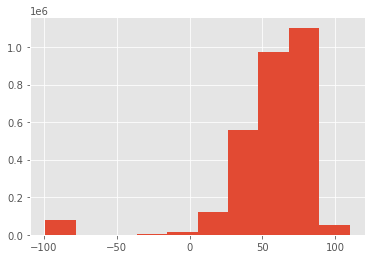

In [432]:
df['AvgTemperature'].hist()

There are around a ten thousand days where the recorded temperature is between -80 and -100. Let's remove those outliers. 

In [433]:
df = df[df['AvgTemperature'] > -50]

Plot the histogram again

<AxesSubplot:>

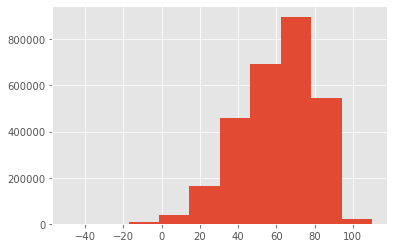

In [434]:
df['AvgTemperature'].hist()

In [435]:
df['AvgTemperature'].sort_values()

1498811    -49.1
1503552    -47.7
1499141    -46.9
1498050    -46.2
1498810    -45.9
           ...  
1036042    109.9
1034963    109.9
1036756    109.9
1032390    109.9
1034962    110.0
Name: AvgTemperature, Length: 2826654, dtype: float64

Reorder the dataframe with respect to year, month, day in descending order

In [436]:
df.sort_values(by=['Year', 'Month', 'Day'], ascending=False, inplace = True)
df.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
9265,Africa,Algeria,Algiers,5,13,2020,60.8
23074,Africa,Benin,Cotonou,5,13,2020,83.5
32340,Africa,Central African Republic,Bangui,5,13,2020,79.2
50871,Africa,Egypt,Cairo,5,13,2020,69.0
69430,Africa,Gabon,Libreville,5,13,2020,80.2


In [437]:
df.tail()

,Region,Country,City,Month,Day,Year,AvgTemperature
2862480,North America,US,Madison,1,1,1995,19.6
2871745,North America,US,Milwaukee,1,1,1995,23.8
2881010,North America,US,Casper,1,1,1995,10.1
2890275,North America,US,Cheyenne,1,1,1995,8.8
2899540,North America,US,San Juan Puerto Rico,1,1,1995,77.4


It has been shown that we do not have all the data for year 2020. Let's remove the rows for the days in 2020.

In [438]:
df = df[df.Year < 2020]

Calculate the mean temperature for each year

In [439]:
year_avg = df[['Year', 'AvgTemperature']].groupby('Year').agg('mean').reset_index()
year_avg.head()

,Year,AvgTemperature
0,1995,59.421659
1,1996,58.674830
2,1997,59.133617
3,1998,60.870440
4,1999,60.328660


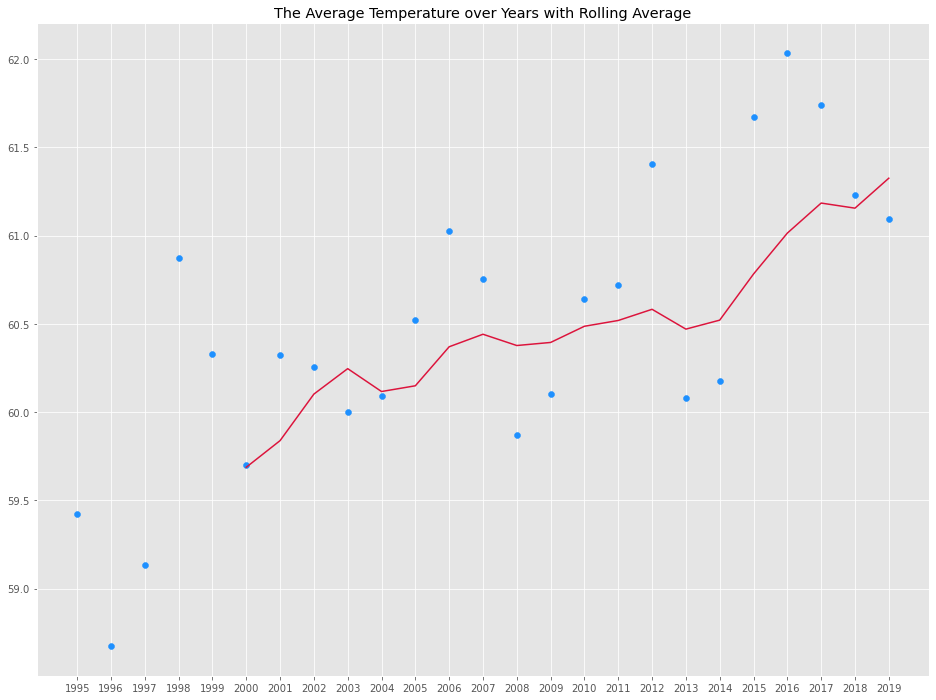

In [440]:
mean_average_temp = year_avg.AvgTemperature.rolling(window=6).mean()
mean_average_temp.index = np.arange(1995, 2020)

plt.figure(figsize=(16,12))
plt.style.use('ggplot')
plt.title('The Average Temperature over Years with Rolling Average')

ax = plt.gca()

ax.scatter(year_avg.Year, year_avg.AvgTemperature, c='dodgerblue')
plt.plot(mean_average_temp.index, mean_average_temp.values, c='crimson')
plt.xticks(year_avg.Year)

plt.show()

Add an overall trend line to the graph

In [441]:
coefs = np.polyfit(year_avg.Year, year_avg.AvgTemperature, deg = 1)
# y = mx + x0
line = coefs[0]*year_avg.Year + coefs[1]

In [442]:
fig = px.line(year_avg, x='Year', y='AvgTemperature')
fig.update_xaxes(dtick = 'Year')
fig.add_trace(go.Scatter(x = year_avg.Year, y = line))

Bar Chart vs Line Chart 

In [443]:
px.bar(year_avg, 'Year', 'AvgTemperature', color='AvgTemperature')

Now, compare yearly average temperature of different regions. First look at what regions are included in the dataset.

In [444]:
df.Region.unique()

array(['Africa', 'Asia', 'Australia/South Pacific', 'Europe',
       'Middle East', 'North America',
       'South/Central America & Carribean'], dtype=object)

In [445]:
region_agg = df[['Region', 'Year', 'AvgTemperature']].groupby(['Region', 'Year']).agg('mean').reset_index()
region_agg

,Region,Year,AvgTemperature
0,Africa,1995,73.890036
1,Africa,1996,73.554702
2,Africa,1997,73.441142
3,Africa,1998,73.748808
4,Africa,1999,73.894222
...,...,...,...
170,South/Central America & Carribean,2015,73.893853
171,South/Central America & Carribean,2016,73.618998
172,South/Central America & Carribean,2017,73.417055
173,South/Central America & Carribean,2018,72.677205


In [446]:
fig = px.line(region_agg, 'Year', 'AvgTemperature', color='Region')
fig.update_xaxes(dtick = 'Year')
fig.show();

An overall upward trend can be observed for all regions worlwide. Middle East, Africa, and Central America & Carribean have the highest average temperatures globally while North America and Europe share the bottom places. 

Analyze the monthly average temperature in Turkey

In [447]:
country_agg = df[['Country', 'Year', 'Month', 'AvgTemperature']].groupby(['Country', 'Year', 'Month']).mean().reset_index()
country_agg.sample(5)

,Country,Year,Month,AvgTemperature
4991,Canada,2004,11,35.427667
9328,Finland,2007,3,37.025806
15574,Jordan,2018,7,79.683871
17505,Lebanon,2012,8,84.890323
2822,Belarus,2019,3,37.561290


In [448]:
Turkey = country_agg[country_agg.Country == 'Turkey']
fig = px.line(Turkey, 'Month', 'AvgTemperature', color='Year')
fig.update_xaxes(dtick = 'Month')
fig.show()

In [449]:
Turkey.loc[:, 'Month']

31150     1
31151     2
31152     3
31153     4
31154     5
         ..
31445     8
31446     9
31447    10
31448    11
31449    12
Name: Month, Length: 300, dtype: int64

Turkey has been observing the highest average temperatures between July and August, and the lowest average temperature between December and February. As it is hard to distinguish distinct years, let's look at the years apart. 

In [451]:
# First merge months and years into a date string 
Turkey.Month = Turkey.Month.astype(str)
Turkey.Year =  Turkey.Year.astype(str)

Turkey['Date'] = Turkey.Month + "/" + Turkey.Year

<ipython-input-451-ec287c3ef734>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-451-ec287c3ef734>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-451-ec287c3ef734>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [452]:
fig = px.bar(Turkey, x = 'Date', y = 'AvgTemperature', color = 'Month')
fig.show()

The seasonal temperatures can be observed more easily here. The average monthly temperature raised from 71.4 to 75.3 over the whole course.  

Determine the outliers and the range the average temperature falls for each month with boxplot

In [453]:
fig = px.box(Turkey, x = 'Month', y = 'AvgTemperature', color='Month')
fig.show()